**SECCIÓ 3: Mètodes espectrals**  
**Exemple 3.5: Equació de Burger's**

En aquest repositori es presenta la simulació emprada per a l’equació de Burger's, **Exemple 3.5**, que correspon a la **Secció 3** del treball.

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy.polynomial.chebyshev as np_cheb
from scipy.integrate import solve_ivp
from scipy.linalg import solve_banded
from math import pi
import matplotlib.pylab as pylab
from scipy.special import eval_chebyt
from scipy.linalg import expm
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


params = {
    'legend.fontsize': 10,
    'legend.loc': 'best',
    'figure.figsize': (14, 5),
    'lines.markerfacecolor': 'none',
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'grid.alpha': 0.6,
    "text.usetex": True,                       
    "font.family": "serif",                    
    "font.serif": ["Computer Modern Roman"],   
    "text.latex.preamble": r"\usepackage{amsmath}" 
}

In [37]:
#Parametres:  
L = 2 * np.pi #domini
N = 50 #nombre harmonics
dt = 0.005 #pasa de temps 
stop_time = 0.9 #temps simulacio
x_samples = 300 #numero de mostres

#x = np.linspace(0, L, x_samples)

def Burgers(N): 
    def ak_0(k): #Calcul valors transformada
        def my_function(x):
            return np.sin(x) * 1/L * np.exp(-2 * np.pi * 1j * k * x / L)
        
        def integrate_function(func):
            real_part = lambda x: np.real(func(x))
            imag_part = lambda x: np.imag(func(x))
            
            real_integral, real_error = quad(real_part, 0, L, limit=100)
            imag_integral, imag_error = quad(imag_part, 0, L, limit=100)
            
            result = real_integral + 1j * imag_integral
            error = real_error + 1j * imag_error
            return result, error
        
        integral_result, _ = integrate_function(my_function)
        return integral_result

    def phik(k, x): #funcions base
        return np.exp((2*np.pi * 1j * k * x) / L)  


    ak_values = np.array([ak_0(k) for k in range(-N, N + 1)], dtype=complex)
    ak_values_history = []

    t_values = np.arange(0, stop_time + dt, dt)
    for t in t_values:
        ak_values_history.append(ak_values.copy())  
        s = np.zeros_like(ak_values, dtype=complex) 

        for k in range(-N, N + 1):
            for n in range(-N, N + 1):
                m = k - n
                if abs(m) <= N:
                    s[k + N] += 1j * m * ak_values[n + N] * ak_values[m + N]

        ak_values -= s * dt  
    ak_values_history = np.array(ak_values_history)


    """Equivalent escrivint el terme lineal d'una altra manera
    for t in t_values:
        ak_values_history.append(ak_values.copy())
        s = np.zeros_like (ak_values, dtype = complex)
        
        for l in range(-N, N + 1):
            for k in range(-N , N + 1):
                m = l - k
                if abs(m) <= N:
                    s [ l + N ] += 1/2 * 1j * l * ak_values [ k + N ] * ak_values [ m + N ]
        ak_values -= s * dt
    ak_values_history = np.array (ak_values_history)
    """

    u_list = [] 
    for i in range(len(ak_values_history)):
        x_values_sol = np.zeros(x_samples, dtype=complex)
        for k in range(-N, N+1, 1): 
            x_values_sol = x_values_sol + ak_values_history[i][k + N]*phik(k,x)
        u_list.append(np.real(x_values_sol))

    return u_list 

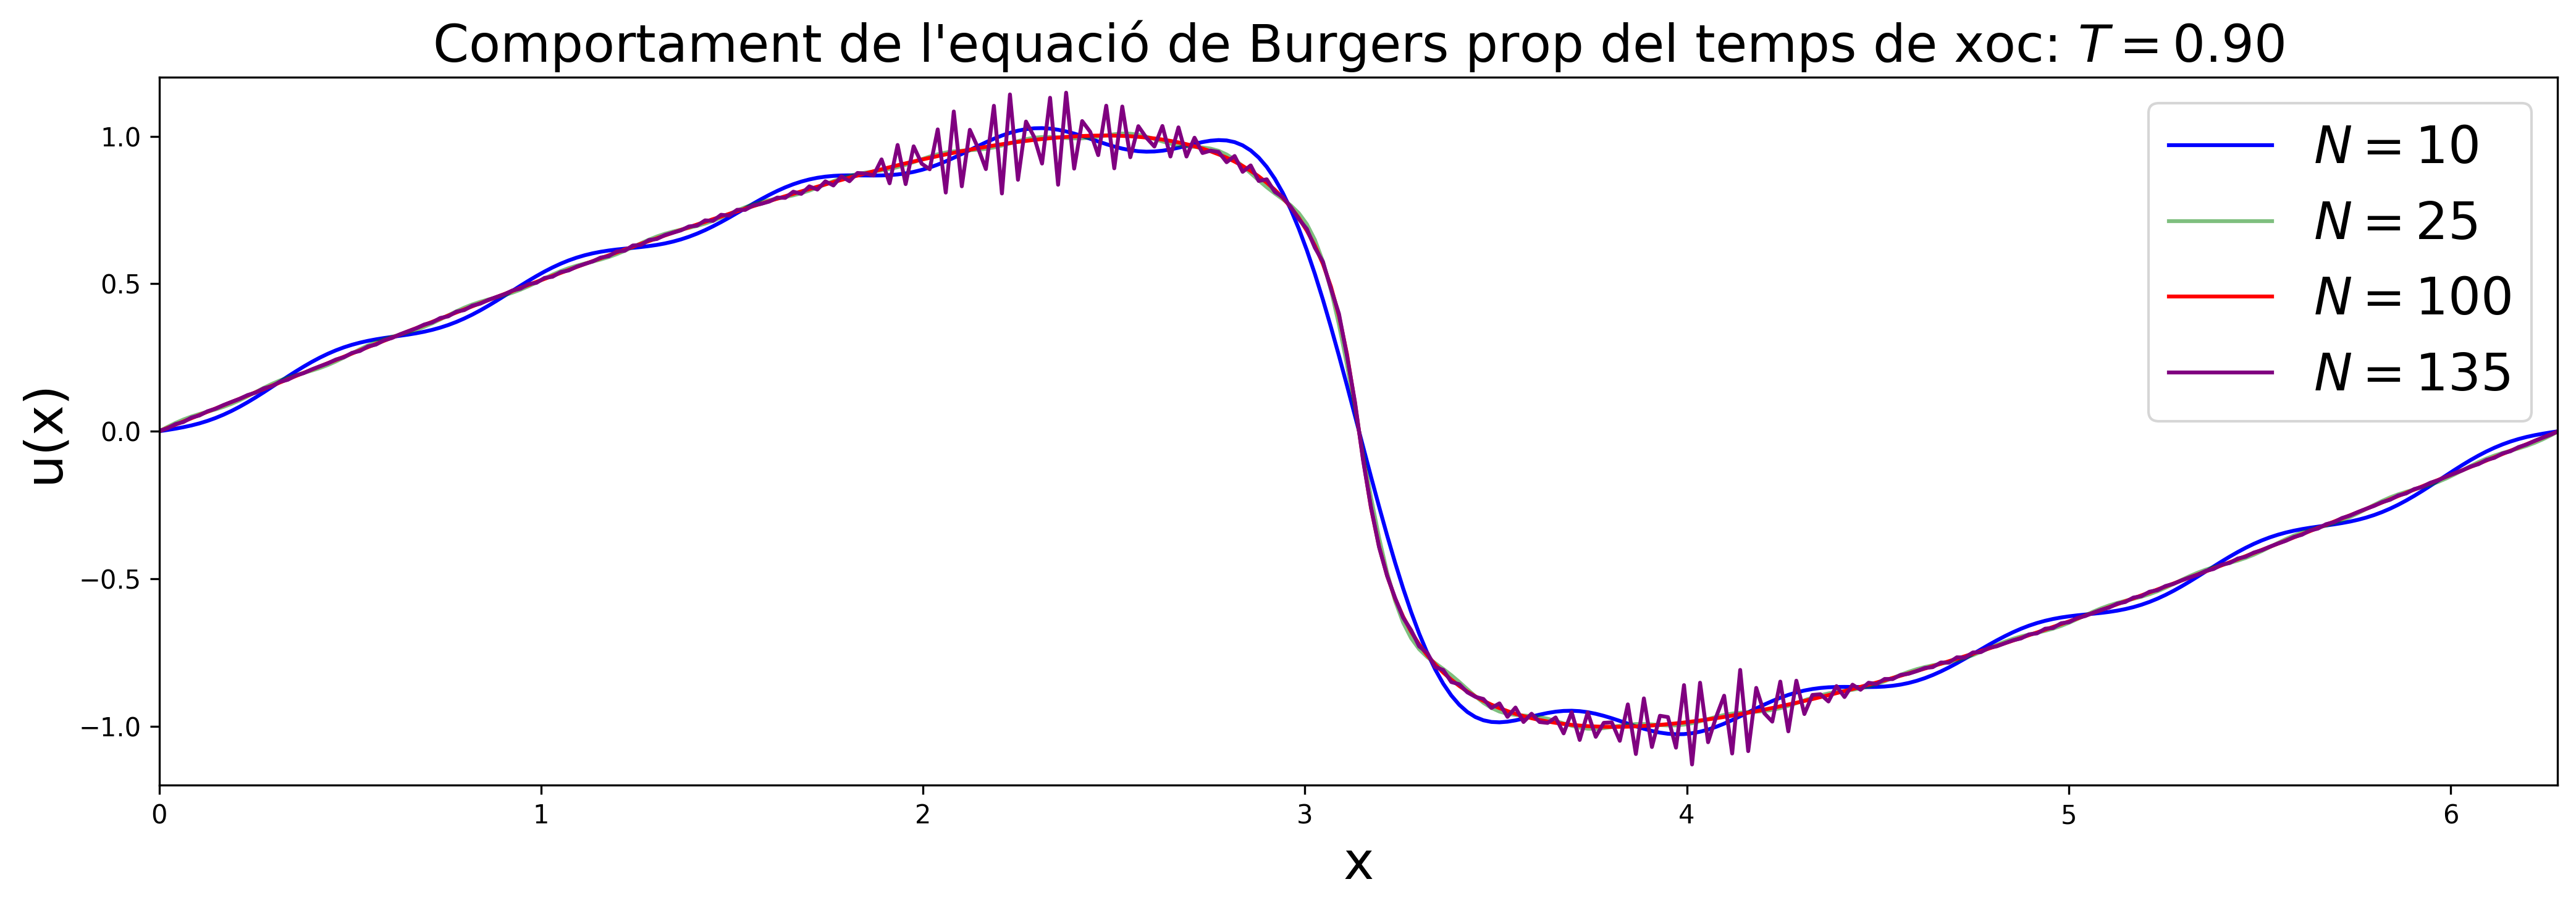

In [43]:
u_list_10 = Burgers(10)
u_list_25 = Burgers(25)
u_list_100 = Burgers(100)
u_list_125 = Burgers(135)

plt.figure(figsize = (14,5), dpi =300)
plt.title(r"Comportament de l'equació de Burgers prop del temps de xoc: $T = {:.2f}$".format(stop_time), fontsize=20)
plt.plot(x, u_list_10[-1], color = "blue", label = r'$N = 10$')
plt.plot(x, u_list_25[-1], color = "green", label = r'$N = 25$', alpha = 0.5)
plt.plot(x, u_list_100[-1], color = "red", label = r'$N = 100$')
plt.plot(x, u_list_125[-1], color = "purple", label = r'$N = 135$', alpha = 1)
plt.xlabel('x', fontsize = 20)
plt.ylabel('u(x)', fontsize = 20)
plt.legend(fontsize = 20)
plt.xlim([0, 6.28])
plt.ylim([-1.2, 1.2])
plt.tight_layout()
plt.show()